https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [30]:
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
features = pd.read_csv('data/temps.csv')
# Actual column is the target
features.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


### 2. Lidia con las variables categóricas del dataset

In [31]:
# One-hot encode the data using pandas get_dummies
#features = pd.get_dummies(features, drop_first=True) # Evitar la colinearidad de los datos
features = pd.get_dummies(features)


# Display the first 5 rows of the last 12 columns
features.iloc[:,5:].head(5)

,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,46.0,44,46,46,46,41,0,0,0,0,0,1,0


### 3. Divide en train y test

In [32]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(features['actual'])

# Remove the labels from the features 
# axis 1 refers to the columns
features= features.drop('actual', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [33]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [34]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (261, 17)
Training Labels Shape: (261,)
Testing Features Shape: (87, 17)
Testing Labels Shape: (87,)


### 4. Entrena el modelo
Utiliza un DecisionTreeRegressor

In [35]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(train_features, train_labels)

DecisionTreeRegressor()

### 5. Calcula su MAE
Sin usar sklearn

In [36]:
# Use the forest's predict method on the test data
predictions = dtr.predict(train_features)
# Calculate the absolute errors
errors = abs(predictions - train_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.0 degrees.


In [37]:
# Use the forest's predict method on the test data
predictions = dtr.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 5.76 degrees.


### 6. Calcula su MAPE
Sin usar sklearn

In [27]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape) 
print('MAPE:', round(accuracy, 2), '%.')

MAPE: 93.24 %.


### 7. Representa el árbol de decision

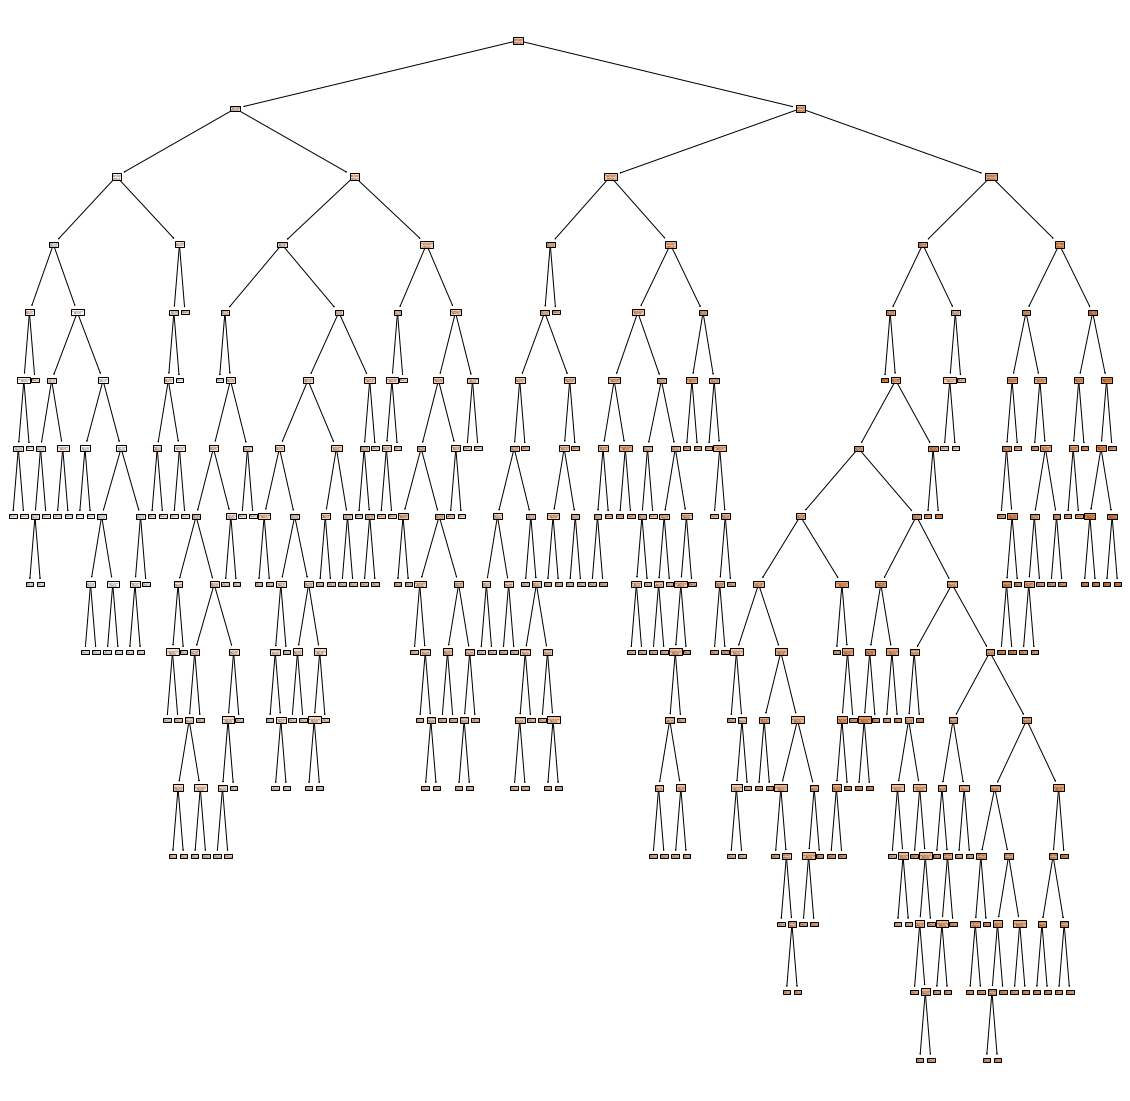

In [22]:
import sklearn
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sklearn.tree.plot_tree(dtr,
               feature_names=feature_list,
               class_names="actual",
               filled = True);

### 8. Modifica el max_depth a 3 y vuelve a entrenarlo

In [38]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=3)

dtr.fit(train_features, train_labels)

DecisionTreeRegressor(max_depth=3)

### 9. Vuelve a calcular si MAE

In [39]:
# Use the forest's predict method on the test data
predictions = dtr.predict(train_features)
# Calculate the absolute errors
errors = abs(predictions - train_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.66 degrees.


In [40]:
# Use the forest's predict method on the test data
predictions = dtr.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 4.41 degrees.


### 10. Vuelve a representar su árbol

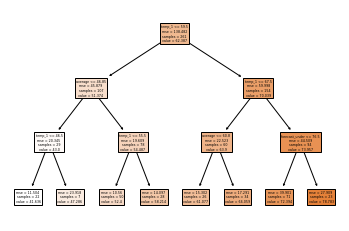

In [25]:
sklearn.tree.plot_tree(dtr,
               feature_names=feature_list,
               class_names="actual",
               filled = True);

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [52]:
dtr.feature_importances_
feature_list

import_dict = {'features': feature_list,
              'importance': dtr.feature_importances_}
pd.DataFrame(import_dict).sort_values('importance', ascending=False)

,features,importance
4,temp_1,0.872637
5,average,0.091943
8,forecast_under,0.023367
7,forecast_acc,0.012052
10,week_Fri,0.000000
15,week_Tues,0.000000
14,week_Thurs,0.000000
13,week_Sun,0.000000
12,week_Sat,0.000000
11,week_Mon,0.000000
